 <p style="padding: 10px;
              color:black;
                font-size:35px;">
            <b>🔘 Guide on handling Outliers</b>
        </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FF718F;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>🔘 Step 1 : Import R Librarie</b>
        </p>
</div>

In [67]:
library("data.table")
library("dplyr")

library("ggplot2")

options(repr.matrix.max.rows=5,repr.matrix.max.cols=10)
options(repr.plot.width = 22, repr.plot.height =10)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FF718F;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>🔘 Step 2: Reading Dataset</b>
        </p>
</div>

In [10]:
data=read.csv("train.csv",sep=",",na="")
View(data)

PassengerId,Survived,Pclass,Name,Sex,⋯,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,⋯,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,⋯,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,⋯,0,STON/O2. 3101282,7.9250,NA,S
⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
890,1,1,"Behr, Mr. Karl Howell",male,⋯,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,⋯,0,370376,7.75,NA,Q


In [11]:
glue::glue("Nombre des lignes:{nrow(data)}, Nombres des colonnes :{ncol(data)}")

Nombre des lignes:891, Nombres des colonnes :12

In [12]:
head(data)

,PassengerId,Survived,Pclass,Name,Sex,⋯,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,⋯,0,A/5 21171,7.2500,NA,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,⋯,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,⋯,0,STON/O2. 3101282,7.9250,NA,S
⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
5,5,0,3,"Allen, Mr. William Henry",male,⋯,0,373450,8.0500,NA,S
6,6,0,3,"Moran, Mr. James",male,⋯,0,330877,8.4583,NA,Q


In [23]:
tail(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,NA,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,NA,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,NA,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,NA,Q


*Data Structure*

In [24]:
 #skimr::skim(data)
str(data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FF718F;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>How to Find Outliers?</b>
        </p>
</div>

<strong style="font-size:30px;text-align:center;">Pourquoi se produisent-ils ?</strong>

Une valeur aberrante peut survenir en raison de la variabilité des données ou d’une erreur expérimentale/humaine.
Ils peuvent indiquer une erreur expérimentale ou une forte asymétrie des données (distribution à queue lourde).

<strong style="font-size:30px;text-align:center;">Qu’est-ce qu’ils affectent ?</strong>

En statistiques, nous avons trois mesures de tendance centrale, à savoir la moyenne, la médiane et le mode. Ils nous aident à décrire les données.
* La moyenne est la mesure précise pour décrire les données lorsque nous n’avons aucune valeur aberrante.
* La médiane est utilisée s'il existe une valeur aberrante dans l'ensemble de données.
* Le mode est utilisé s’il existe une valeur aberrante ET qu’environ la moitié ou plus des données sont identiques.
La moyenne est la seule mesure de la tendance centrale qui est affectée par les valeurs aberrantes, ce qui à son tour a un impact sur l'écart type.

<strong style="font-size:30px;text-align:center;">Détection des valeurs aberrantes</strong>

Si notre ensemble de données est petit, nous pouvons détecter la valeur aberrante en regardant simplement l'ensemble de données. Mais que se passe-t-il si nous disposons d’un énorme ensemble de données, comment pouvons-nous alors identifier les valeurs aberrantes ? Nous devons utiliser des techniques de visualisation et mathématiques.

Vous trouverez ci-dessous quelques-unes des techniques de détection des valeurs aberrantes

* Boîtes à moustaches
* Score Z ( Normal Distribution)
* Plage interquantile (IQR) ( Skewed Distribution)

<img src=https://cdn.discordapp.com/attachments/517815672613503006/874179036371386378/unknown.png>

### Score Z & Boxplot

<div class="alert alert-block alert-info" style=";font-size:14px;font-family:nexa;">
<strong>Détection des valeurs aberrantes à l'aide des scores Z</strong>
    <br> <br>
    
<strong>Critères :</strong> tout point de données dont le score Z se situe en dehors du 3ème écart type est une valeur aberrante.
    

<strong>Détection des valeurs aberrantes avec les scores Z</strong>

Pas
* parcourez tous les points de données et calculez le score Z à l'aide de la formule (Xi-mean)/std.
* définissez une valeur seuil de 3 et marquez les points de données dont la valeur absolue du score Z est supérieure au seuil comme valeurs aberrantes.
    
</div>

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2023/09/image-76.png">

Warning message:
"Use of `data$Age` is discouraged.
ℹ Use `Age` instead."
Warning message:
"Removed 177 rows containing non-finite values (`stat_density()`)."


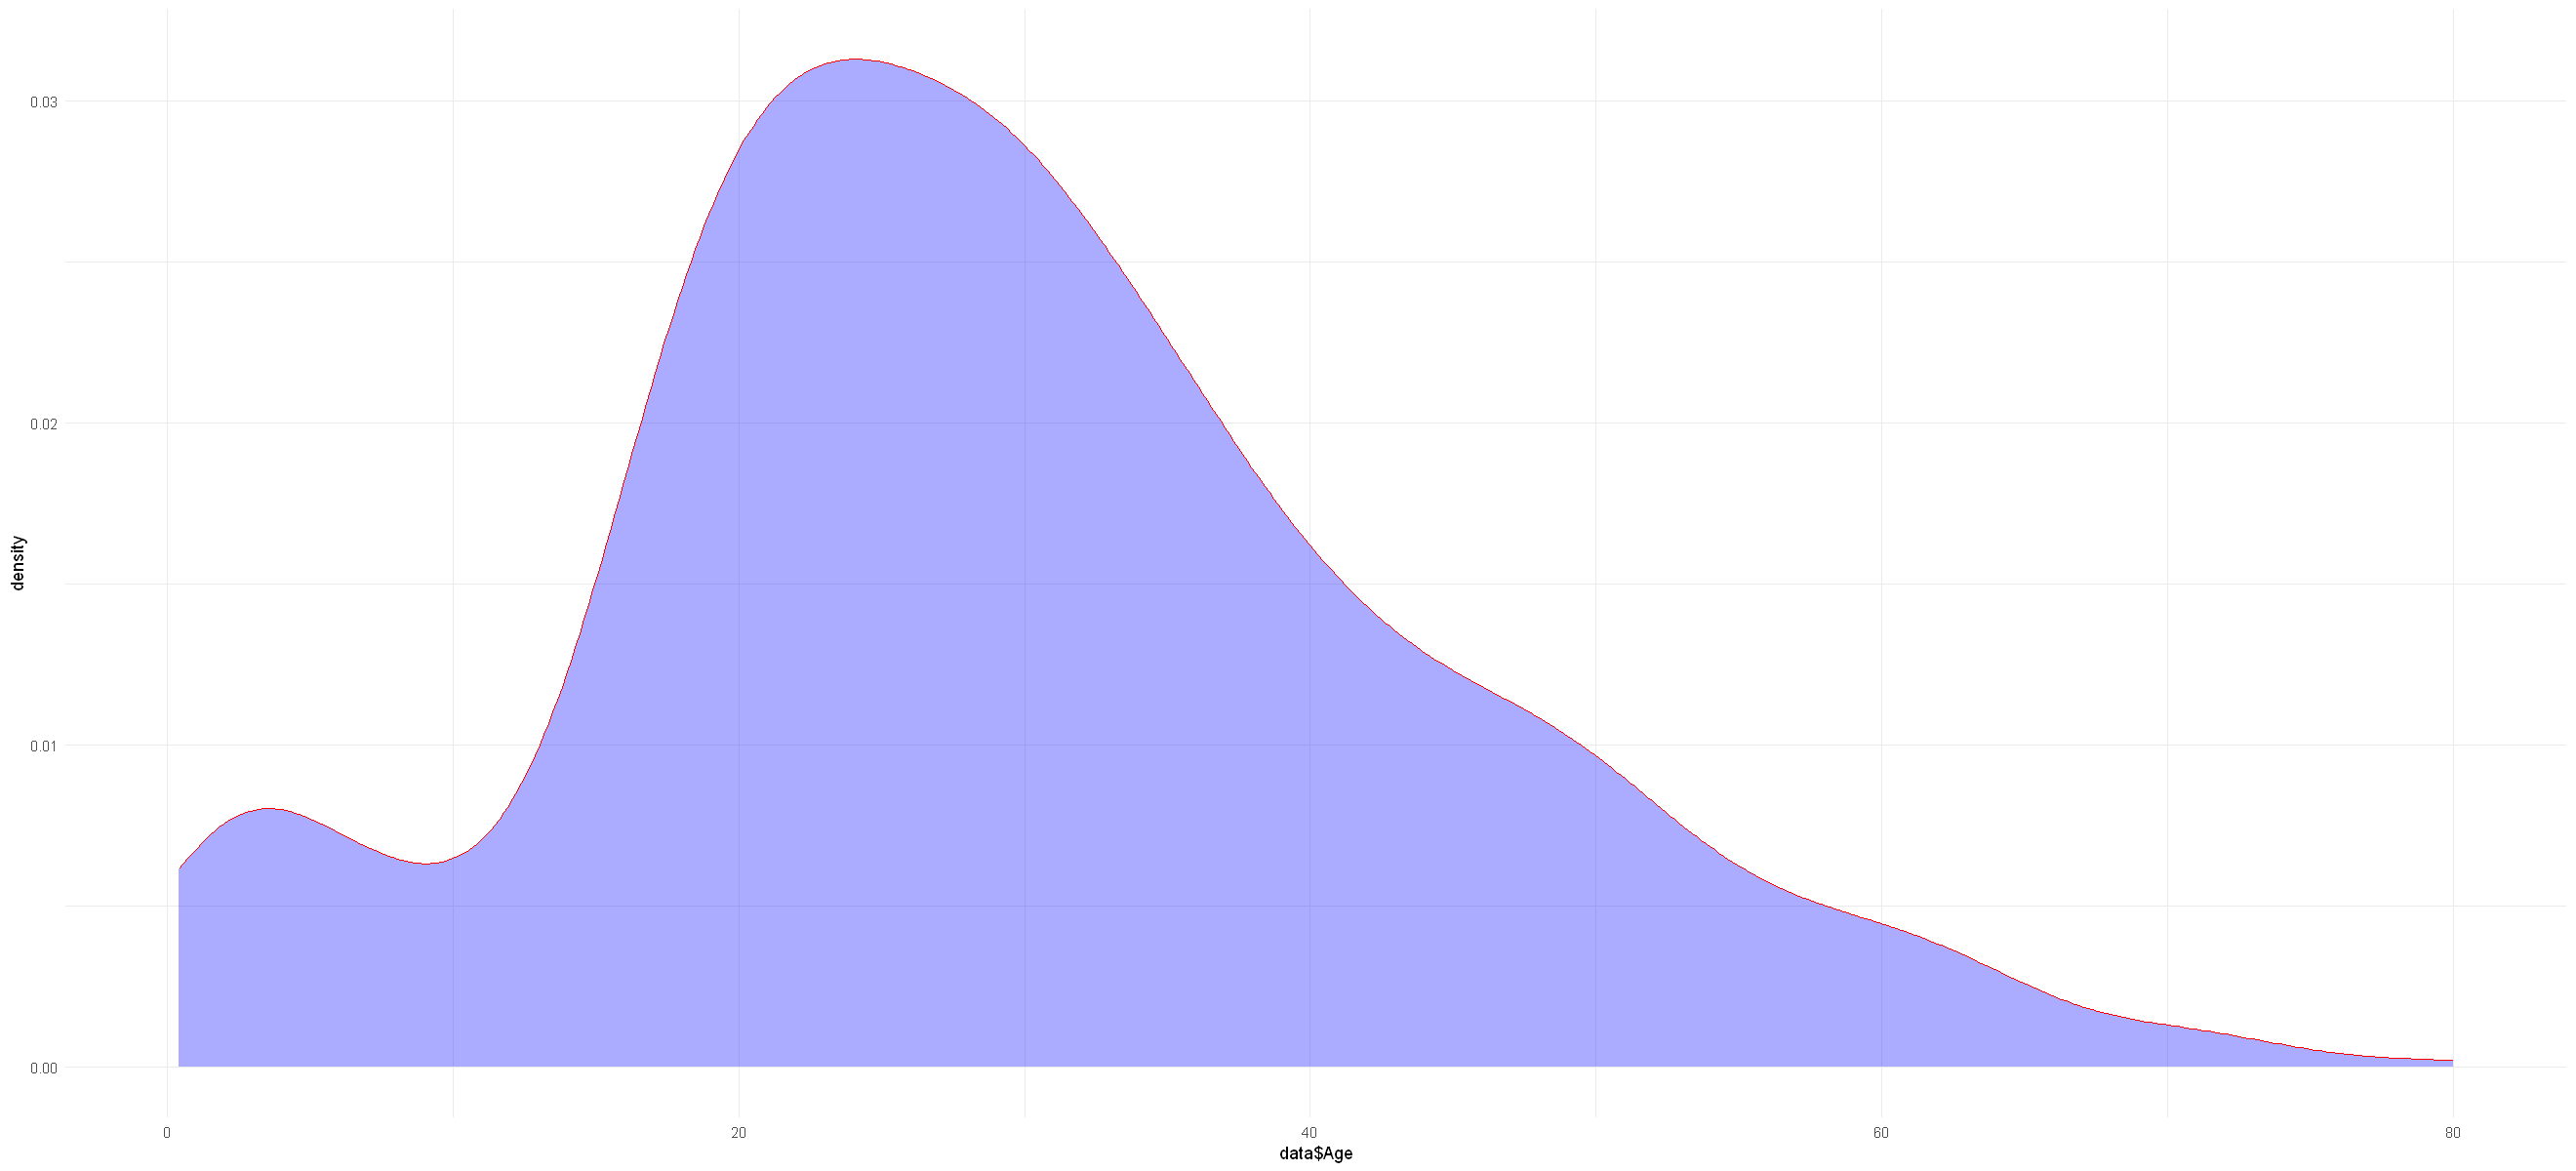

In [65]:
# Plot density
ggplot(data, aes(x=data$Age)) +
  geom_density(color = "red", fill = "blue", alpha = 0.328) +
  theme_minimal()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:nexa;">
    Nous detectons que la variable age ne suit pas la loi normale, donc la distribution est asymetrique positive. Donc nous ne pouvons pas utiliser la methode de z-score, mais celui de l'inter-quartile.

Deuxiemement, le boxplot on voit qu'il y a des données manquantes
</div>

In [58]:
detect_outliers_zscore=function(dataframe,thres=3){
    outliers=numeric(0)
    mean=mean(dataframe,na.rm=TRUE)
    std=sd(dataframe,na.rm=TRUE)
    
    for(i in dataframe){
        z_score=(i-mean)/std
        if(abs(z_score)>thres){
            outliers=c(outliers,i)
            }
        }
    return(outliers)
    }

sample_outliers=detect_outliers_zscore(data$Age,3) 
sample_outliers
#print("Outliers from Z-scores method: ", sample_outliers)

ERROR: Error in if (abs(z_score) > thres) {: valeur manquante là où TRUE / FALSE est requis


#### Boxplot

<div class="alert alert-block alert-info" style=" background-color:green;font-size:14px;color:white;font-family:nexa;">
<strong>Détection des valeurs aberrantes à l'aide de la plage inter quantile (IQR)</strong>

<strong>Critères : </strong>les points de données qui se situent 1,5 fois l'IQR au-dessus du troisième trimestre et en dessous du premier trimestre sont des valeurs aberrantes. Cela montre en détail le traitement des valeurs aberrantes en Python.

<strong>Pas</strong>
* Trier l'ensemble de données par ordre croissant
* calculer les 1er et 3ème quartiles (Q1, Q3)
* calculer IQR=Q3-Q1
* calculer la limite inférieure = (Q1–1,5*IQR), la limite supérieure = (Q3+1,5*IQR)
* parcourez les valeurs de l'ensemble de données et recherchez celles qui se situent en dessous de la limite inférieure et au-dessus de la limite supérieure et marquez-les comme valeurs aberrantes
</div>

<img src="https://editor.analyticsvidhya.com/uploads/12311IQR.png">

Warning message:
"Use of `data$Age` is discouraged.
ℹ Use `Age` instead."
Warning message:
"Removed 177 rows containing non-finite values (`stat_boxplot()`)."


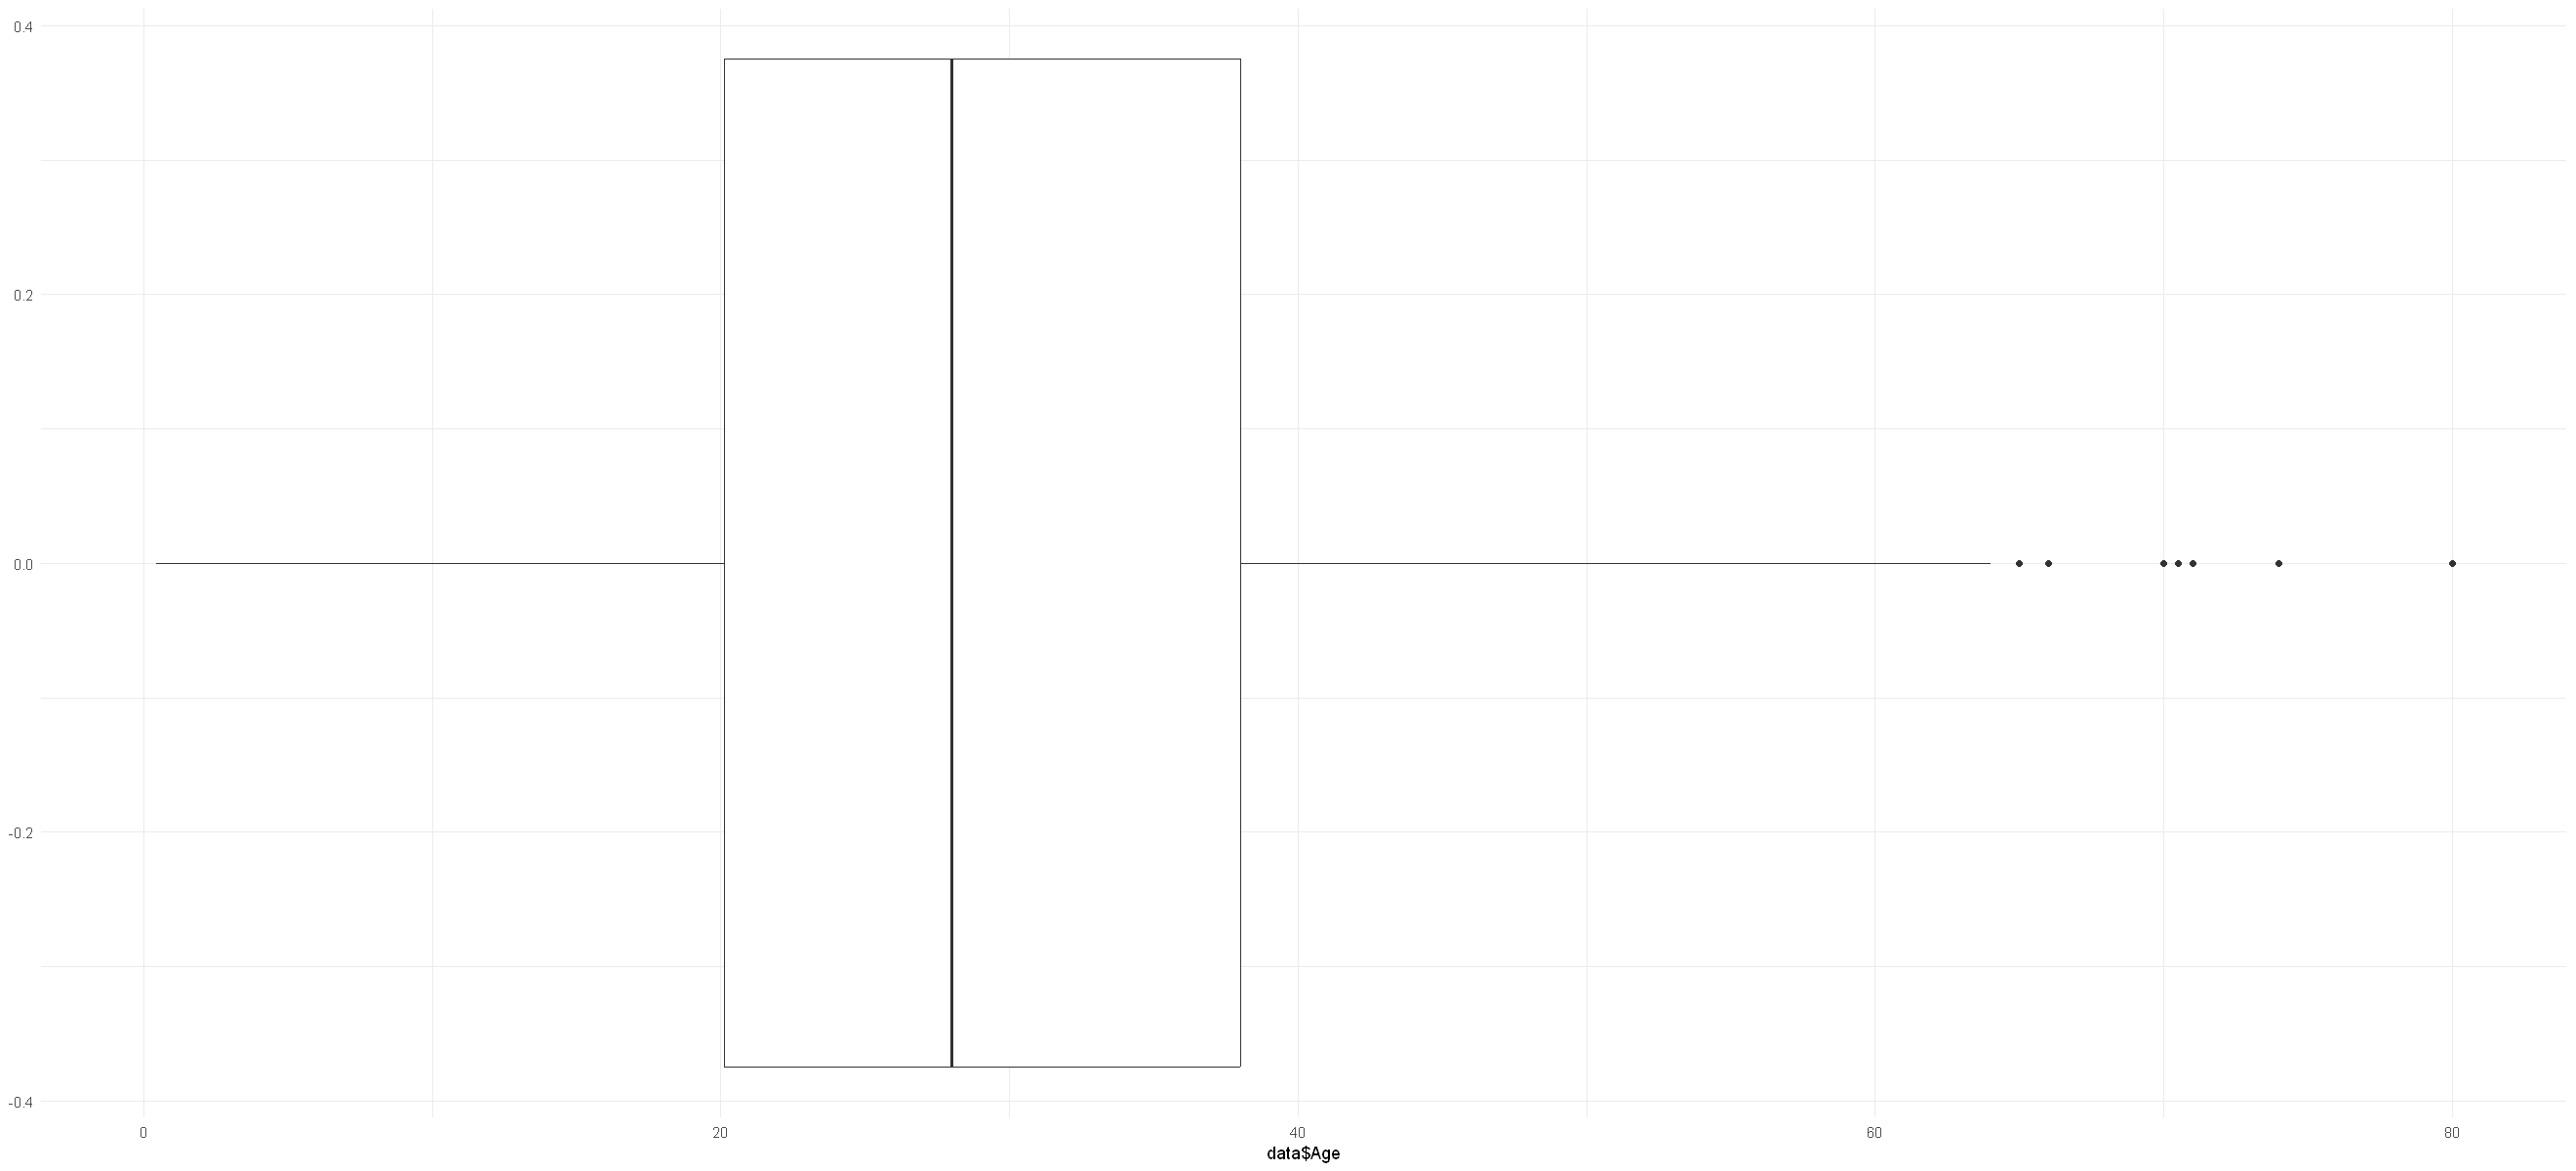

In [63]:
# Plot density
ggplot(data, aes(x=data$Age)) +
  geom_boxplot() +

  theme_minimal()

In [66]:

detect_outliers_iqr=function(dataframe){
    outliers=numeric(0)
    data=sort(dataframe)
    q1=quantile(dataframe,probs=0.25,na.rm=TRUE)
    q3=quantile(dataframe,probs=0.75,na.rm=TRUE)
    
    iqr=q3-q1
    lwr_bound=q1-(1.5*iqr)
    upr_bound=q3+(1.5*iqr)
    
    for(i in dataframe){
        if(i<lwr_bound || i>upr_bound){
             outliers <- c(outliers, i)
            }
        }
      return(outliers)
    }

detect_outliers_iqr(dat$alpha)

[1] 500

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5CCBD0;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>How to Hnadling Outliers?</b>
        </p>
</div>

<img src=https://cdn.discordapp.com/attachments/517815672613503006/874185466637877318/unknown.png>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:nexa">
   <b>1. Trimming</b> est la méthode permettant de couper ou de supprimer les valeurs aberrantes à la fin de l'ensemble de données. C'est plus facile que toutes les autres méthodes. <br>
   <b>2. Capping</b> définit une limite pour la fonctionnalité et définit la valeur de toutes les valeurs aberrantes dépassant la limite sur la valeur de la limite. Ainsi, dans l'exemple de l'étudiant, nous fixerons une limite de score et modifierons le score de l'étudiant à 2 % par celui-ci. Par exemple, 75 est la limite de score maximum que nous fixons. Le score des 2 % d'élèves aberrants sera fixé à 75. <br>
  <b>3. Percentiles</b> est un centile égal des deux côtés pour détecter les valeurs aberrantes. Une fois que vous avez détecté ces valeurs aberrantes, vous pouvez utiliser soit le découpage, soit le plafonnement pour vous en débarrasser.
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:nexa">
    <strong>Comment gérer les valeurs aberrantes ?</strong>
<br>Jusqu'à présent, nous avons appris à détecter les valeurs aberrantes. La principale question est de savoir comment gérer les valeurs aberrantes ?
<br><br>
Vous trouverez ci-dessous quelques-unes des méthodes permettant de traiter les valeurs aberrantes :
</div>

#### <p style="color:Blue">Trimming</p>

**Dans cette technique, nous supprimons les valeurs aberrantes de l'ensemble de données. Même si ce n’est pas une bonne pratique à suivre.**

**La valeur aberrante « 101 » est supprimée et le reste des points de données est copié dans un autre tableau « a ».**

In [ ]:
data[dat$apha==500]

#### <p style="color:Blue">Capping</p>

**Dans cette technique, la valeur aberrante est plafonnée à une certaine valeur supérieure à la valeur du 90e centile ou plancher à un facteur inférieur à la valeur du 10e centile. Code Python pour supprimer la valeur aberrante et copier le reste des éléments dans un autre tableau.**

*Les points de données inférieurs au 10e centile sont remplacés par la valeur du 10e centile et les points de données supérieurs au 90e centile sont remplacés par la valeur du 90e centile.*

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers 
tenth_percentile = quantile(dat$alpha, 0.1) 
ninetieth_percentile = quantile(dat$alpha, 0.9) 
# print(tenth_percentile, ninetieth_percentile)b = 
dat[dat$alpha<tenth_percentile]=tenth_percentile
dat[dat$alpha<ninetieth_percentile]=ninetieth_percentile

# print("Sample:", sample) 
print("New array:",b)

#### <p style="color:Blue">Imputation moyenne/médiane</p>

**La valeur moyenne étant fortement influencée par les valeurs aberrantes, il est conseillé de remplacer les valeurs aberrantes par la valeur médiane.**

In [ ]:
median = median(dat$alpha)# Replace with median for i in sample_outliers:     
c = dat[dat$alpha==500]=40 
print("Sample: ", dat) 
print("New array: ",c) # print(x.dtype)